## **1. Import Libraries & Load Dataset**

In [5]:
#Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [6]:
# Import Dataset
from google.colab import files
uploaded = files.upload()

Saving titanic.xlsx to titanic.xlsx


In [7]:
file_name = list(uploaded.keys())[0]

# **EDA (Exploratory Data Analysis)**

## **2. Data Observation**

### Data Info

In [8]:
df = pd.read_excel(file_name)
df.head()

,survived,name,sex,age
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000
1,1,"Allison, Master. Hudson Trevor",male,0.9167
2,0,"Allison, Miss. Helen Loraine",female,2.0000
3,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000
4,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000


In [9]:
df.tail()

,survived,name,sex,age
495,1,"Mallet, Mrs. Albert (Antoinette Magnin)",female,24.0
496,0,"Mangiavacchi, Mr. Serafino Emilio",male,NaN
497,0,"Matthews, Mr. William John",male,30.0
498,0,"Maybery, Mr. Frank Hubert",male,40.0
499,0,"McCrae, Mr. Arthur Gordon",male,32.0


In [10]:
df.sample(5)

,survived,name,sex,age
106,0,"Farthing, Mr. John",male,NaN
105,0,"Evans, Miss. Edith Corse",female,36.0
301,0,"Walker, Mr. William Anderson",male,47.0
236,0,"Ringhini, Mr. Sante",male,22.0
328,0,"Angle, Mr. William A",male,34.0


Observation:

1. survived and age column are numerical, name and sex column are categorical
2. sex column seems to contain two distinct values (male or female), but will confirm later
4. survived is apparently also binary (0,1)
5. No obvious defect on the data (column name and its entries), all looks good

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  500 non-null    int64  
 1   name      500 non-null    object 
 2   sex       500 non-null    object 
 3   age       451 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 15.8+ KB


Observation:

1. Data Contains 4 columns with 500 rows
2. age column have missing values (will be handled)
3. Most data types look appropriate. However, the sex column will be converted to numeric values to support further analysis

### Statistical Summary

In [12]:
df.columns

Index(['survived', 'name', 'sex', 'age'], dtype='object')

In [13]:
# Group column names based on type
# It will make our life easier onwards
categoricals = ['name', 'sex']

numericals = ['survived', 'age']

In [14]:
# Syntax numerical statistical summary
df[numericals].describe()

,survived,age
count,500.000000,451.000000
mean,0.540000,35.917775
std,0.498897,14.766454
min,0.000000,0.666700
25%,0.000000,24.000000
50%,1.000000,35.000000
75%,1.000000,47.000000
max,1.000000,80.000000


Observation :

1. age has only 451 values out of 500 entries, indicating 49 missing values that need to be handled (e.g., via manipulation or removal)
2. mean ~50% (Median) in survived and age columns, indicating a symmetric distribution
*   survived mean = 0.54, median = 1.0 -> slightly more passengers survived than
not, indicating some imbalance but still reasonably distributed
*   age mean = 35.92, median = 35.00 -> very close values, suggest a symmetrical age distribution
3. Overall, the minimum and maximum values make sense for both columns
* survived column has values ranging from 0 to 1, which aligns with binary classification (didn't survive vs survived)
* age column ranges from approximately 0.67 to 80 years, which is plausible for titanic passengers

In [15]:
# Syntax describe method on categorical data
df[categoricals].describe()

,name,sex
count,500,500
unique,499,2
top,"Eustis, Miss. Elizabeth Mussey",male
freq,2,288


Observation:

1. name column has 499 unique values out of 500 entries, indicating that one name appears twice (possibly a duplicate or two passengers with the same name).
2. sex have 2 unique values, 'male' and 'female'
3. most passengers are male (288 out of 500 entries), while the rest are female.
4. in the categorical column there are no missing values.

In [16]:
for col in numericals:
  print(df[col].value_counts())

survived
1    270
0    230
Name: count, dtype: int64
age
24.0000    23
30.0000    20
36.0000    19
18.0000    14
42.0000    14
45.0000    14
35.0000    14
22.0000    12
28.0000    12
23.0000    11
21.0000    11
31.0000    11
48.0000    11
25.0000    11
29.0000    10
54.0000    10
50.0000    10
34.0000    10
47.0000    10
39.0000     9
27.0000     9
33.0000     8
49.0000     8
38.0000     8
19.0000     8
40.0000     8
55.0000     8
32.0000     7
60.0000     7
17.0000     7
26.0000     7
44.0000     6
52.0000     6
37.0000     6
58.0000     6
64.0000     5
46.0000     5
57.0000     5
51.0000     5
16.0000     4
53.0000     4
56.0000     4
43.0000     4
62.0000     4
61.0000     4
1.0000      3
8.0000      3
63.0000     3
41.0000     3
15.0000     2
71.0000     2
20.0000     2
65.0000     2
4.0000      2
6.0000      2
2.0000      1
0.9167      1
14.0000     1
11.0000     1
76.0000     1
59.0000     1
80.0000     1
28.5000     1
32.5000     1
70.0000     1
45.5000     1
13.0000     1
67.00

Observation:

1. survived data has binary numbers with almost even distribution, 270 and 230

2. The age column includes 73 unique values ​​from a total of 500 entries, indicating the diversity of passenger ages

3. The most frequently occurring ages are 24, 30, and 36 years

4. Most age values ​​only appear once, so they can affect the skewness when visualizing the data

In [17]:
for col in categoricals:
  print(df[col].value_counts())

name
Eustis, Miss. Elizabeth Mussey                                                        2
Becker, Miss. Ruth Elizabeth                                                          1
Becker, Miss. Marion Louise                                                           1
Becker, Master. Richard F                                                             1
Beauchamp, Mr. Henry James                                                            1
Beane, Mrs. Edward (Ethel Clarke)                                                     1
Beane, Mr. Edward                                                                     1
Bateman, Rev. Robert James                                                            1
Banfield, Mr. Frederick James                                                         1
Ball, Mrs. (Ada E Hall)                                                               1
Baimbrigge, Mr. Charles Robert                                                        1
Bailey, Mr. Percy Andrew   

Observation:

1. The possibility of data duplication is seen in the name "Eustis, Miss. Elizabeth Mussey", which appears twice.

## **3. Data Cleansing**

### Duplicate Data

In [18]:
len(df)

500

In [19]:
len(df.drop_duplicates())

499

In [21]:
len(df.drop_duplicates())/len(df)
# If the output of the code in this cell does not have a value of 1, then there are duplicates

0.998

The output of the code in this cell is not 1, meaning there is duplicate data.

In [22]:
# Fetch duplicate rows (including the original)
duplicates = df[df.duplicated(keep=False)]

In [23]:
# Display the duplicates data
duplicates

,survived,name,sex,age
104,1,"Eustis, Miss. Elizabeth Mussey",female,54.0
349,1,"Eustis, Miss. Elizabeth Mussey",female,54.0


In [24]:
# Count the number of occurrences of each duplicate row
duplicates.groupby(list(df.columns)).size()

,,,,0
survived,name,sex,age,
1,"Eustis, Miss. Elizabeth Mussey",female,54.0,2


In [25]:
# Displays the number of duplicates in table format
duplicates.groupby(list(df.columns)).size().reset_index(name='number_of_duplicates')

,survived,name,sex,age,number_of_duplicates
0,1,"Eustis, Miss. Elizabeth Mussey",female,54.0,2


In [26]:
# Count the frequency of occurrence of each duplicate row
duplicates_counts = duplicates.groupby(list(df.columns)).size().reset_index(name='number_of_duplicates')

# Sort by number of duplicates
sorted_duplicates = duplicates_counts.sort_values(by='number_of_duplicates', ascending=False)

# Display results
sorted_duplicates

,survived,name,sex,age,number_of_duplicates
0,1,"Eustis, Miss. Elizabeth Mussey",female,54.0,2


In [28]:
# Handling drop duplicate
df = df.drop_duplicates()

In [31]:
len(df.drop_duplicates())/len(df)

1.0

The output of the code in this cell is 1, so there is no duplicate data and it has been handled.

### Null Values

In [32]:
# View the number of Null Values ​​for each column
df.isna().sum()

,0
survived,0
name,0
sex,0
age,49


Identified 49 Null Values in the age column

### Fill Null Values

In [33]:
print(df['age'].dtype)
print(df['age'].median())

float64
35.0


In [34]:
for column in df.select_dtypes(include=['number']).columns:
  df[column]=df[column].fillna(df[column].median())

### Check Data After Cleansing

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 499 entries, 0 to 499
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  499 non-null    int64  
 1   name      499 non-null    object 
 2   sex       499 non-null    object 
 3   age       499 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 19.5+ KB


After the process of removing duplicate data, the dataset has been free from duplicate values. In addition, the empty data in the age column has been filled with the median, which is 35. Because this column is a numeric data type and using the median is the right approach to maintain the harmony of data distribution.

## **4. Data Visualization**

### Amount & Gender

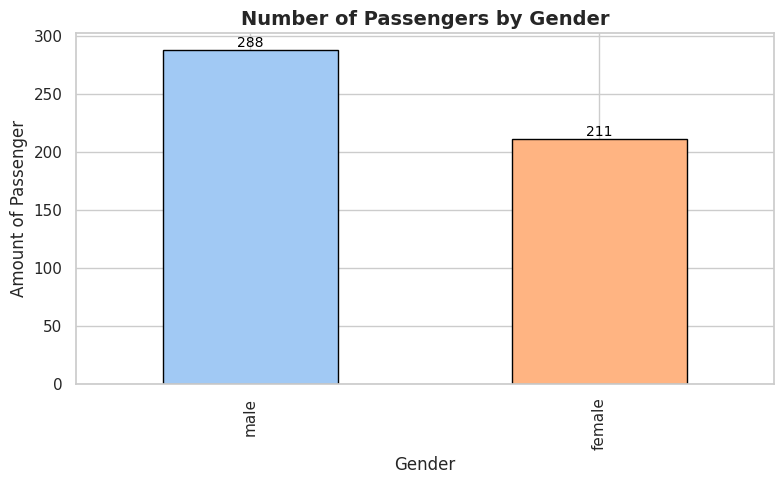

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_theme(style="whitegrid")

# For figure
plt.figure(figsize=(8, 5))

# Plot data
ax = df['sex'].value_counts().plot(
    kind='bar',
    color=sns.color_palette('pastel'),
    edgecolor='black'
)

# Set title and label
plt.title("Number of Passengers by Gender", fontsize=14, fontweight='bold')
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Amount of Passenger", fontsize=12)

# Add number above bar
for bar in ax.patches:
    ax.annotate(
        f'{int(bar.get_height())}',  # Biar angkanya bulat
        (bar.get_x() + bar.get_width() / 2, bar.get_height()),
        ha='center',
        va='bottom',
        fontsize=10,
        color='black'
    )

# Tight layout
plt.tight_layout()

# Display plot
plt.show()


From the graph it can be seen that the number of male passengers is greater than female:

* Male: 288 people
* Female: 211 people

### Age Distribution

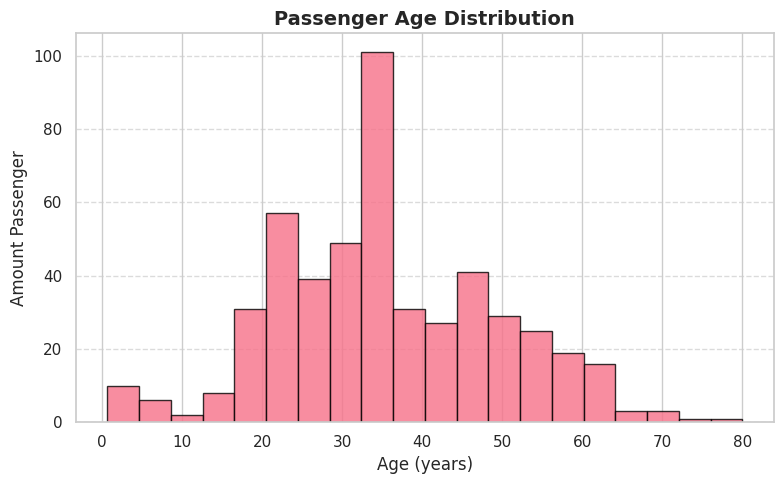

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_theme(style="whitegrid")

# For figure
plt.figure(figsize=(8, 5))

# Plot histogram
plt.hist(
    df['age'],
    bins=20,
    color=sns.color_palette("husl", 1)[0],
    edgecolor='black',
    alpha=0.8
)

# Set title and label
plt.title("Passenger Age Distribution", fontsize=14, fontweight='bold')
plt.xlabel("Age (years)", fontsize=12)
plt.ylabel("Amount Passenger", fontsize=12)

# Add grid on y axis
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Tight Layout
plt.tight_layout()

# Display plot
plt.show()


Based on the age distribution histogram above, it can be seen that the majority of passengers are in the 30 to 40 year age range, with the peak number of passengers at the age of 35 years.

### Age & Living Status

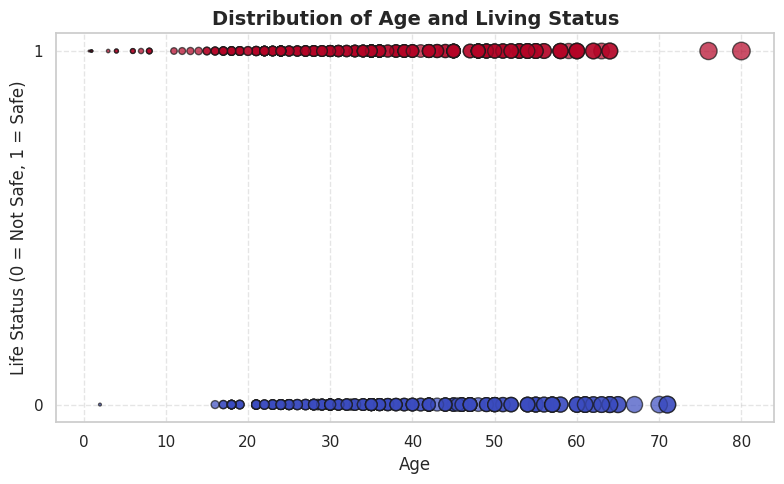

In [48]:
import matplotlib.pyplot as plt

# For figure
plt.figure(figsize=(8, 5))

# Plot scatter
plt.scatter(
    df['age'],
    df['survived'],
    alpha=0.7,
    c=df['survived'],
    cmap='coolwarm',
    edgecolor='k',          # Add border line (black)
    s=df['age']*2         # Point size is proportional to age
)

# Set title and label
plt.title("Distribution of Age and Living Status", fontsize=14, fontweight='bold')
plt.xlabel("Age", fontsize=12)
plt.ylabel("Life Status (0 = Not Safe, 1 = Safe)", fontsize=12)

# Set yticks to only 0 and 1
plt.yticks([0, 1])

# Add grid
plt.grid(True, linestyle='--', alpha=0.5)

# Tight layout
plt.tight_layout()

# Add plot
plt.show()


Based on the age distribution chart above, it can be concluded that:

* There are many small children (low age) who survived, because there are red dots at young ages.
* Certain age groups (maybe 20-40 years old) seem to have a more random survival rate than children.
* Adult passengers (middle to old age) vary, some survived and some did not.
* Could lead to the hypothesis that children were prioritized during evacuation (eg: "children first").



### Average Survival

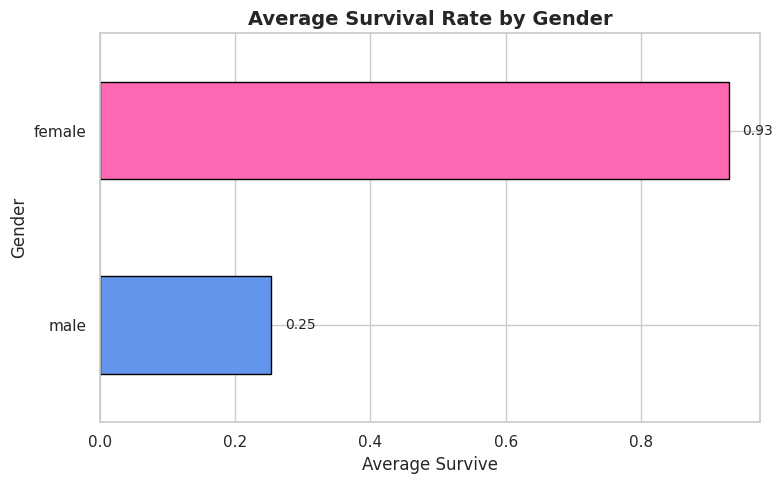

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_theme(style="whitegrid")

# For figure
plt.figure(figsize=(8, 5))

# Calculate the average survival per gender
survive_rate = df.groupby('sex')['survived'].mean().sort_values()

# Define manual colors
colors = ['#6495ED', '#FF69B4']  # Blue for male, Pink for female

# Plot bar horizontal
ax = survive_rate.plot(
    kind='barh',
    color=colors,
    edgecolor='black'
)

# Set title and label
plt.title("Average Survival Rate by Gender", fontsize=14, fontweight='bold')
plt.xlabel("Average Survive", fontsize=12)
plt.ylabel("Gender", fontsize=12)

# Add number labels next to the bars
for bar in ax.patches:
    plt.text(
        bar.get_width() + 0.02,   # Slide a little right
        bar.get_y() + bar.get_height()/2,
        f'{bar.get_width():.2f}',
        ha='left',
        va='center',
        fontsize=10
    )

# Tight layout
plt.tight_layout()

# Add plot
plt.show()


Typically, women have a higher survival rate than men, because in cases like the Titanic, women and children were given priority during evacuation.

This graph helps us understand the difference in survival chances between genders directly.